In [2]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.UCI_HAR)
dataset = HARDataset(cfg, parse, override_csv=False)

train_loader, test_loader, val_loader = dataset.get_dataloaders()

1. loading dataframe...
2. checking format...
3. resample for equidistant sampling...
3. applying selections...
4. applying resampling...
4. applying normalizations...
5. get windows...


Loading windows: 100%|██████████| 4841/4841 [00:02<00:00, 2212.25it/s]

6. applying per sample normalizations...
7. splitting into train, test and val...
7. done


In [3]:
dataset.window_index
dataset.windows[1]

,total_acc_x,total_acc_y,total_acc_z,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z
0,1.023127,-0.120016,0.091117,0.003531,0.004456,-0.005915,0.026189,-0.000238,0.002159
1,1.021882,-0.121499,0.092676,0.002285,0.003046,-0.004139,0.021651,-0.000428,-0.000272
2,1.019178,-0.122841,0.096064,-0.000420,0.001776,-0.000543,0.014551,0.000761,0.002631
3,1.015861,-0.123717,0.099897,-0.003738,0.000969,0.003490,0.014815,-0.003026,0.003376
4,1.012893,-0.123817,0.097627,-0.006706,0.000937,0.001409,0.016694,-0.005988,0.000057
...,...,...,...,...,...,...,...,...,...
123,1.019434,-0.130473,0.081413,-0.000316,-0.006250,-0.013208,-0.018794,-0.010192,-0.001239
124,1.020479,-0.130590,0.082474,0.000695,-0.006176,-0.012023,-0.020755,-0.011117,-0.004299
125,1.021707,-0.130900,0.082404,0.001906,-0.006389,-0.012026,-0.021434,-0.010417,-0.004000
126,1.022935,-0.131210,0.082334,0.003117,-0.006601,-0.012030,-0.022114,-0.009717,-0.003702


torch.Size([32, 128, 9])


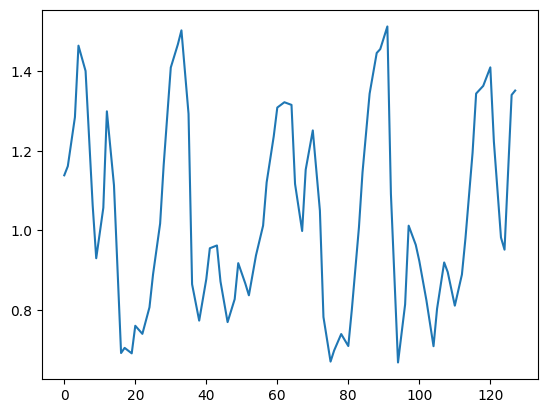

In [17]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()